# Downloading Data

In [1]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedabdallah98","key":"05df623b311b1a8123f43cce3e4e80a2"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c fake-news

 73% 34.0M/46.5M [00:00<00:00, 125MB/s] 
100% 46.5M/46.5M [00:00<00:00, 129MB/s]


In [5]:
!mkdir Datasets
!unzip fake-news.zip -d Datasets

Archive:  fake-news.zip
  inflating: Datasets/submit.csv     
  inflating: Datasets/test.csv       
  inflating: Datasets/train.csv      


## Import libraries

In [6]:
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import gensim
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")


import itertools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Reading Data and EDA

In [7]:
data = pd.read_csv('/content/Datasets/train.csv')

In [8]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [9]:
y=data['label']

In [10]:
X=data.drop(columns=['label'])

In [11]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [13]:
data['text'].isnull().sum()

39

# Preprocessing

In [14]:
data.dropna(inplace =True)

In [15]:
news_msg = data.copy()

In [16]:
news_msg.reset_index(inplace = True)

In [17]:
news_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18285 entries, 0 to 18284
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   18285 non-null  int64 
 1   id      18285 non-null  int64 
 2   title   18285 non-null  object
 3   author  18285 non-null  object
 4   text    18285 non-null  object
 5   label   18285 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 857.2+ KB


In [18]:
news_msg['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [19]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(news_msg)):
    review = re.sub('[^a-zA-Z]', ' ', news_msg['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[6]

'beno hamon win french socialist parti presidenti nomin new york time'

In [21]:
countvector=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=countvector.fit_transform(corpus).toarray()

In [22]:
X.shape

(18285, 5000)

In [23]:
y=news_msg['label']

In [24]:
y.shape

(18285,)

In [25]:
countvector.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [26]:
#countvector.get_params()

# Splitting Data and Visuals

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=0)

### Using Counvectorizer (BoW)

In [28]:
count_df = pd.DataFrame(X_train,columns= countvector.get_feature_names())

In [29]:
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploring different models and Evaluation metrics

### Confusion_Matrix

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1.Random Forest Classifier

In [31]:
randomclassifier=RandomForestClassifier(n_estimators=400,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [32]:
y_pred_1 = randomclassifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3389
           1       0.89      0.97      0.93      2646

    accuracy                           0.93      6035
   macro avg       0.93      0.94      0.93      6035
weighted avg       0.94      0.93      0.93      6035

******************************************************************************************************************************************************

Accuracy score is  0.9322286661143331 

******************************************************************************************************************************************************

Confusion matrix, without normalization


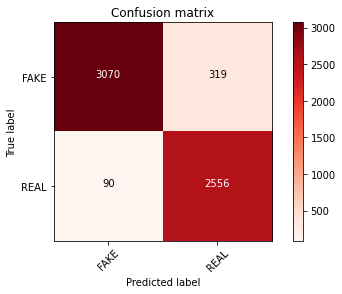

In [33]:
print(classification_report(y_test, y_pred_1))
print(150 * '*'+'\n')
score=accuracy_score(y_test,y_pred_1)
print("Accuracy score is " , score ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_pred_1)
plot_confusion_matrix(cm, classes=['FAKE','REAL']);

## 2. MultinomialNB Classifier :

In [34]:
classifier_2 = MultinomialNB()
classifier_2.fit(X_train, y_train)

MultinomialNB()

In [35]:
y_pred_2 = classifier_2.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3389
           1       0.87      0.91      0.89      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035

******************************************************************************************************************************************************

Accuracy score is  0.9019055509527755 

******************************************************************************************************************************************************

Confusion matrix, without normalization


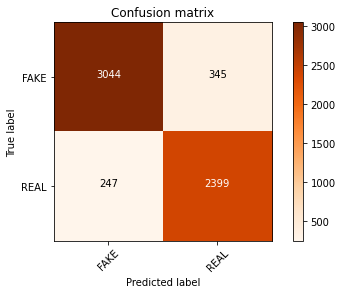

In [36]:
print(classification_report(y_test, y_pred_2))
print(150 * '*'+'\n')
score=accuracy_score(y_test,y_pred_2)
print("Accuracy score is " , score ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_pred_2)
plot_confusion_matrix(cm, classes=['FAKE','REAL'],cmap=plt.cm.Oranges);

## 3.Multi_Layer_Preceptron

In [37]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)
model_mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.005, max_iter=500, random_state=1)

In [38]:
y_pred_3 = model_mlp.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3389
           1       0.90      0.93      0.91      2646

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035

******************************************************************************************************************************************************

Accuracy score is  0.923943661971831 

******************************************************************************************************************************************************

Confusion matrix, without normalization


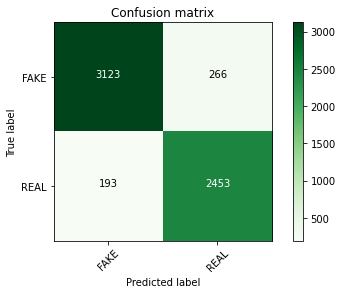

In [39]:
print(classification_report(y_test, y_pred_3))
print(150 * '*'+'\n')
score=accuracy_score(y_test,y_pred_3)
print("Accuracy score is " , score ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_pred_3)
plot_confusion_matrix(cm, classes=['FAKE','REAL'],cmap=plt.cm.Greens);

## 4. SVM classifier :

In [40]:
model_svm= SVC(C=25,gamma=.05,kernel='rbf',probability=True)
model_svm.fit(X_train, y_train)

SVC(C=25, gamma=0.05, probability=True)

In [41]:
y_pred_4 = model_svm.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred_4)

0.9343827671913836

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3389
           1       0.91      0.95      0.93      2646

    accuracy                           0.93      6035
   macro avg       0.93      0.94      0.93      6035
weighted avg       0.94      0.93      0.93      6035

******************************************************************************************************************************************************

Accuracy score is  0.9343827671913836 

******************************************************************************************************************************************************

Confusion matrix, without normalization


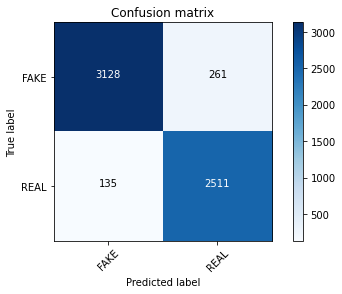

In [43]:
print(classification_report(y_test, y_pred_4))
print(150 * '*'+'\n')
score=accuracy_score(y_test,y_pred_4)
print("Accuracy score is " , score ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_pred_4)
plot_confusion_matrix(cm, classes=['FAKE','REAL'],cmap=plt.cm.Blues);

## 5. Passive Agressive Classifier :


In [107]:
linear_clf = PassiveAggressiveClassifier(C=10,max_iter=100,random_state=2)
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier(C=10, max_iter=100, random_state=2)

In [108]:
accuracy_score(y_train,linear_clf.predict(X_train))

0.9999183673469387

In [109]:
y_pred_5 = linear_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3389
           1       0.90      0.92      0.91      2646

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035

******************************************************************************************************************************************************

Accuracy score is  0.9204639602319801 

******************************************************************************************************************************************************

Confusion matrix, without normalization


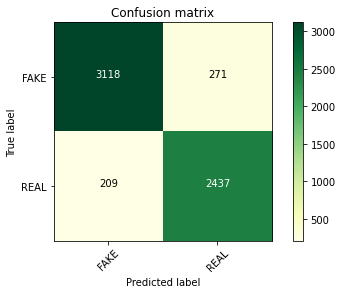

In [110]:
print(classification_report(y_test, y_pred_5))
print(150 * '*'+'\n')
sc=accuracy_score(y_test,y_pred_5)
print("Accuracy score is " , sc ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_pred_5)
plot_confusion_matrix(cm, classes=['FAKE','REAL'],cmap=plt.cm.YlGn);

# *We can see thet Best Classifier is : Support vector machine classifier with slightly much time for training than MultinomialNB Classifier*


### Let's see how the MultinomialNB classifier rewards different features (corresponding learned victorized words according to whether it is real or fake) in some example 

In [48]:
feature_names = countvector.get_feature_names()

In [63]:
sorted(zip(classifier_2.coef_[0], feature_names))[:5000]

[(-10.700949702360713, 'abe'),
 (-10.700949702360713, 'abroad'),
 (-10.700949702360713, 'abus new'),
 (-10.700949702360713, 'abus new york'),
 (-10.700949702360713, 'act new'),
 (-10.700949702360713, 'act new york'),
 (-10.700949702360713, 'advic'),
 (-10.700949702360713, 'advis new'),
 (-10.700949702360713, 'advis new york'),
 (-10.700949702360713, 'age new'),
 (-10.700949702360713, 'age new york'),
 (-10.700949702360713, 'agenda breitbart'),
 (-10.700949702360713, 'ail'),
 (-10.700949702360713, 'aleppo new'),
 (-10.700949702360713, 'aleppo new york'),
 (-10.700949702360713, 'ali'),
 (-10.700949702360713, 'america breitbart'),
 (-10.700949702360713, 'america new york'),
 (-10.700949702360713, 'american breitbart'),
 (-10.700949702360713, 'american new'),
 (-10.700949702360713, 'american new york'),
 (-10.700949702360713, 'ami'),
 (-10.700949702360713, 'ami schumer'),
 (-10.700949702360713, 'amp'),
 (-10.700949702360713, 'ann'),
 (-10.700949702360713, 'ann coulter'),
 (-10.700949702360

In [50]:
min(sorted(zip(classifier_2.coef_[0], feature_names))[:5000])

(-10.700949702360713, 'abe')

In [52]:
max(sorted(zip(classifier_2.coef_[0], feature_names))[:5000])

(-4.011350433181747, 'trump')

 -----------------

## Let's now use tf-idf to encode words and repeat the process of classification again :

In [111]:
messages=data.copy()


In [114]:
messages.dropna(inplace = True)

In [115]:
messages.reset_index(inplace = True)

In [117]:
y=messages['label']

In [119]:
corpus_new = []
for i in range(0, len(messages)):
    review_1 = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review_1 = review_1.lower()
    review_1 = review_1.split()
    
    review_1 = [ps.stem(word) for word in review_1 if not word in stopwords.words('english')]
    review_1 = ' '.join(review_1)
    corpus_new.append(review_1)

In [120]:
corpus_new[4]

'iranian woman jail fiction unpublish stori woman stone death adulteri'

In [121]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_new = tfidf_v.fit_transform(corpus_new).toarray()

## Splitting

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=0)

## Encoding words using TF-IDF vectorizer 

In [123]:
count_df_new = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df_new 

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Models and Evaluation :

### 1. MultinomialNB

In [124]:
c1 =  MultinomialNB()
c1.fit(X_train, y_train)

MultinomialNB()

In [125]:
y_hat_1 = c1.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3389
           1       0.91      0.80      0.86      2646

    accuracy                           0.88      6035
   macro avg       0.89      0.87      0.88      6035
weighted avg       0.88      0.88      0.88      6035

******************************************************************************************************************************************************

Accuracy score is  0.8810273405136703 

******************************************************************************************************************************************************

Confusion matrix, without normalization


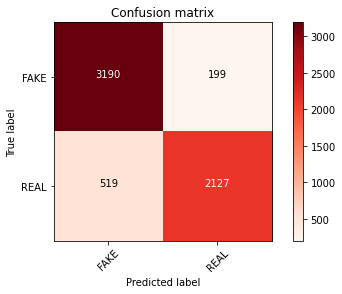

In [126]:
print(classification_report(y_test, y_hat_1))
print(150 * '*'+'\n')
score=accuracy_score(y_test,y_hat_1)
print("Accuracy score is " , score ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_hat_1)
plot_confusion_matrix(cm, classes=['FAKE','REAL']);

### 2. Passive aggressive :

In [130]:
c2 = PassiveAggressiveClassifier(max_iter=100,random_state=2)
c2.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=100, random_state=2)

In [133]:
y_hat_2 = c2.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3389
           1       0.90      0.91      0.91      2646

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035

******************************************************************************************************************************************************

Accuracy score is  0.9169842584921293 

******************************************************************************************************************************************************

Confusion matrix, without normalization


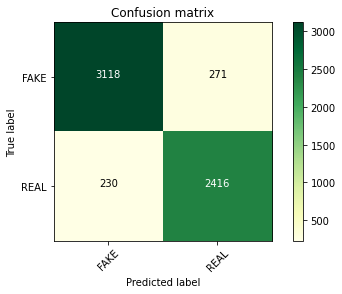

In [134]:
print(classification_report(y_test,y_hat_2))
print(150 * '*'+'\n')
sc=accuracy_score(y_test,y_hat_2)
print("Accuracy score is " , sc ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_hat_2)
plot_confusion_matrix(cm, classes=['FAKE','REAL'],cmap=plt.cm.YlGn);

---------------------------------------

## Now Encoding words using Hashing vectorizer :

In [139]:
hs_vectorizer=HashingVectorizer(n_features=5000,alternate_sign=False)
X_last=hs_vectorizer.fit_transform(corpus_new).toarray()

In [140]:
X_last

array([[0.        , 0.31622777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Splitting :

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_last, y, test_size=0.33, random_state=0)

## Models and Evaluation :

### 1. MultinomialNB :

In [142]:
c11 =  MultinomialNB()
c11.fit(X_train, y_train)

MultinomialNB()

In [143]:
y_hat_11= c11.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3389
           1       0.91      0.78      0.84      2646

    accuracy                           0.87      6035
   macro avg       0.88      0.86      0.87      6035
weighted avg       0.87      0.87      0.87      6035

******************************************************************************************************************************************************

Accuracy score is  0.8707539353769677 

******************************************************************************************************************************************************

Confusion matrix, without normalization


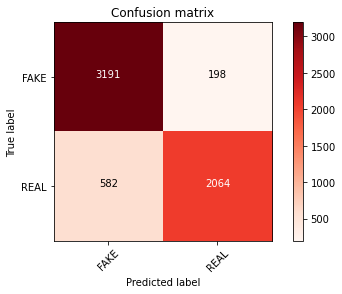

In [144]:
print(classification_report(y_test, y_hat_11))
print(150 * '*'+'\n')
score=accuracy_score(y_test,y_hat_11)
print("Accuracy score is " , score ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_hat_11)
plot_confusion_matrix(cm, classes=['FAKE','REAL']);

### 2. Passive Agressive :

In [145]:
c22 = PassiveAggressiveClassifier(max_iter=100,random_state=2)
c22.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=100, random_state=2)

In [146]:
y_hat_22 = c22.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3389
           1       0.85      0.94      0.90      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.91      0.90      6035
weighted avg       0.91      0.90      0.90      6035

******************************************************************************************************************************************************

Accuracy score is  0.9032311516155758 

******************************************************************************************************************************************************

Confusion matrix, without normalization


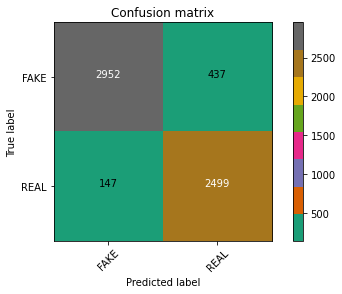

In [156]:
print(classification_report(y_test,y_hat_22))
print(150 * '*'+'\n')
sc=accuracy_score(y_test,y_hat_22)
print("Accuracy score is " , sc ,'\n')
print(150 * '*'+'\n')
cm = confusion_matrix(y_test, y_hat_22)
plot_confusion_matrix(cm, classes=['FAKE','REAL'],cmap=plt.cm.Dark2);

## We can see that the Passive-Agressive classifier performs better than MultinomialNB classifier on this task whatever the type of vectorization we use to encode words...